In [1]:
# Standard Imports
import numpy as np, pandas as pd, random, json, time, os

# Plotly Imports
import plotly.graph_objects as go
import plotly.express as px

# Dash Imports
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [12]:
df = pd.read_csv("CSV/nsf23300-tab001-007.csv",encoding='cp1252', skiprows=[])

df.head


<bound method NDFrame.head of                     Field and citizenship status    2011    2012    2013   
0                      All doctorate recipientsa  48,909  50,943  52,703  \
1                                  Life sciences  11,535  11,964  12,207   
2    Agricultural sciences and natural resources   1,206   1,255   1,324   
3             Biological and biomedical sciences   8,152   8,322   8,354   
4                                Health sciences   2,177   2,387   2,529   
..                                           ...     ...     ...     ...   
127                    Other humanities and arts     299     324     316   
128                                        Other     786     834     945   
129       Business management and administration     477     542     600   
130                                Communication     132     107     133   
131       Non-science and engineering fields nec     177     185     212   

       2014    2015    2016    2017    2018    2019    20

In [ ]:
# Standard Imports
import numpy as np, pandas as pd, random, json, time, os

# Plotly Imports
import plotly.graph_objects as go
import plotly.express as px

# Dash Imports
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Additional Imports
# import STUFF

df710 = pd.read_csv("CSV/nsf23300-tab007-010.csv",encoding='cp1252')

# Load CSS sheet for style information
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Define the Web-App Object and set to variable "server"
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

# Suppres some output
app.config.suppress_callback_exceptions = True


#################################################
################# Layout ########################
#################################################

app.layout = html.Div([
    #h1 = level 1 header, etc...#
    html.H1(children='Graduate Student Data 1970-2021'),
    html.H2(children='This dashboard helps visualize location and statistics based data of doctorate recipients'),
    
    html.H6("Change below to make a new figure:"),
    
    html.Div([
           "Selection:",
           dcc.Dropdown(['All fields','Agricultural sciences and natural resources','Biological and biomedical sciences','Computer and information sciences','Engineering','Geosciences, atmospheric, and ocean sciences','Health sciences','Mathematics and statistics','Multidisciplinary/ interdisciplinary sciences','Physical sciences','Psychology','Social sciences','Business','Education','Humanities','Visual and performing arts','Other'], 'All fields', id = 'my-input')
    ]),

    html.Div([
		"State",
		dcc.Dropdown(['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'], 'Iowa',id = 'my-input2')
	]),
    
    
    html.Br(),
    
    
    html.Div([
        html.Div([
            dcc.Graph(id='figure-output')], 
            style={'width': '49%', 'display': 'inline-block', 'vertical-align': 'middle'}),

        html.Div([dcc.Graph(id='figure-output2')], 
            style={'width': '49%', 'display': 'inline-block', 'vertical-align': 'middle'})
    ]),

])

#####################
# Plot one          #
#####################
@app.callback(
    Output('figure-output', 'figure'),
    Input('my-input', 'value'))    
def make_plot(pltcolor):
    fig = go.Figure()
    hi = df710[pltcolor].max()
    low = df710[pltcolor].min()
    fig = px.choropleth(df710,
                    locations = 'Abbrev',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    color = pltcolor,
                    hover_name = 'State or location',
                    #hover_data = ['Male','Female'],
                    range_color = [low,hi],
                    color_continuous_scale = 'armyrose')  
                    
    #fig.update_layout(title="Model Output")

    
    return fig  
    




#####################
# Plot two          #
#####################
@app.callback(
    Output('figure-output2', 'figure'),
    #Input('my-input', 'value'),
    Input('my-input2', 'value'))    
def make_plot(state):
    fig = px.pie(df7103, 'State or location', state, color_discrete_sequence=px.colors.diverging.Armyrose)
                    
    #fig.update_layout(title="Model Output")
    
    return fig    




    
# -------------------------- MAIN ---------------------------- #


# This is the code that gets run when we call this file from the terminal
# The port number can be changed to fit your particular needs
if __name__ == '__main__':
    app.run_server(host='localhost', port=8080, debug=True, use_reloader=False)


Dash is running on http://localhost:8080/

 * Serving Flask app '__main__'
 * Debug mode: on


In [65]:
df = pd.read_csv("CSV/nsf23300-tab007-006.csv",encoding='cp1252')
df['Total Rank'] = df['Total'].rank()
df['Tot Sci Eng Rank'] = df['Tot Sci Eng'].rank()
df['Male Sci Eng Rank'] = df['Male Sci Eng'].rank()
df['Female Sci Eng Rank'] = df['Female Sci Eng'].rank()
df['Tot Non Sci Rank'] = df['Tot Non Sci'].rank()
df['Male Non Sci Rank'] = df['Male Non Sci'].rank()
df['Female Non Sci Rank'] = df['Female Non Sci'].rank()
df['Ratio M/F'] = df['Male']/df['Female']
df['Ratio Sci/Non'] = df['Tot Sci Eng']/df['Tot Non Sci']
df[:3]

,State or location,Abbrev,Rank,Total,Male,Female,Tot Sci Eng,Male Sci Eng,Female Sci Eng,Tot Non Sci,...,Female Non Sci,Total Rank,Tot Sci Eng Rank,Male Sci Eng Rank,Female Sci Eng Rank,Tot Non Sci Rank,Male Non Sci Rank,Female Non Sci Rank,Ratio M/F,Ratio Sci/Non
0,California,CA,1,5892.0,3267.0,2623.0,4959.0,2848.0,2109.0,933.0,...,514.0,52.0,52.0,52.0,52.0,51.0,52.0,50.0,1.245520,5.315113
1,Texas,TX,2,4118.0,2213.0,1904.0,3155.0,1803.0,1352.0,963.0,...,552.0,51.0,51.0,51.0,51.0,52.0,51.0,52.0,1.162290,3.276220
2,New York,NY,3,3871.0,2030.0,1840.0,2975.0,1653.0,1321.0,896.0,...,519.0,50.0,50.0,50.0,50.0,50.0,50.0,51.0,1.103261,3.320312


In [155]:
df710 = pd.read_csv("CSV/nsf23300-tab007-010.csv",encoding='cp1252')
df710


,State or location,Abbrev,All fields,Agricultural sciences and natural resources,Biological and biomedical sciences,Computer and information sciences,Engineering,"Geosciences, atmospheric, and ocean sciences",Health sciences,Mathematics and statistics,Multidisciplinary/ interdisciplinary sciences,Physical sciences,Psychology,Social sciences,Business,Education,Humanities,Visual and performing arts,Other
0,Alabama,AL,640.0,25.0,119.0,11.0,117.0,8.0,30.0,22.0,16.0,45.0,57.0,17.0,24.0,105.0,14.0,1.0,29.0
1,Alaska,AK,42.0,5.0,3.0,0.0,2.0,11.0,0.0,0.0,2.0,2.0,10.0,4.0,0.0,2.0,0.0,0.0,1.0
2,Arizona,AZ,935.0,21.0,112.0,31.0,198.0,23.0,41.0,25.0,35.0,86.0,58.0,104.0,25.0,61.0,43.0,40.0,32.0
3,Arkansas,AR,275.0,21.0,49.0,18.0,48.0,2.0,8.0,2.0,3.0,20.0,11.0,16.0,14.0,40.0,12.0,0.0,11.0
4,California,CA,5892.0,81.0,979.0,285.0,1082.0,146.0,177.0,236.0,191.0,668.0,486.0,628.0,126.0,192.0,333.0,120.0,162.0
5,Colorado,CO,1024.0,23.0,166.0,39.0,217.0,56.0,46.0,46.0,13.0,107.0,59.0,56.0,7.0,92.0,33.0,32.0,32.0
6,Connecticut,CT,731.0,13.0,154.0,22.0,88.0,14.0,20.0,36.0,12.0,97.0,45.0,102.0,22.0,12.0,54.0,15.0,25.0
7,Delaware,DE,212.0,12.0,35.0,9.0,55.0,4.0,2.0,9.0,3.0,28.0,7.0,21.0,2.0,9.0,7.0,2.0,7.0
8,Florida,FL,2339.0,66.0,305.0,139.0,408.0,67.0,137.0,69.0,81.0,185.0,169.0,158.0,58.0,218.0,105.0,47.0,127.0
9,Georgia,GA,1451.0,50.0,286.0,94.0,360.0,17.0,58.0,35.0,36.0,107.0,71.0,103.0,37.0,67.0,63.0,10.0,57.0


In [133]:
df7102.dtypes

State or location    object
Alabama              object
Alaska               object
Arizona              object
Arkansas             object
California           object
Colorado             object
Connecticut          object
Delaware             object
Florida              object
Georgia              object
Hawaii               object
Idaho                object
Illinois             object
Indiana              object
Iowa                 object
Kansas               object
Kentucky             object
Louisiana            object
Maine                object
Maryland             object
Massachusetts        object
Michigan             object
Minnesota            object
Mississippi          object
Missouri             object
Montana              object
Nebraska             object
Nevada               object
New Hampshire        object
New Jersey           object
New Mexico           object
New York             object
North Carolina       object
North Dakota         object
Ohio                

42.0 5892.0


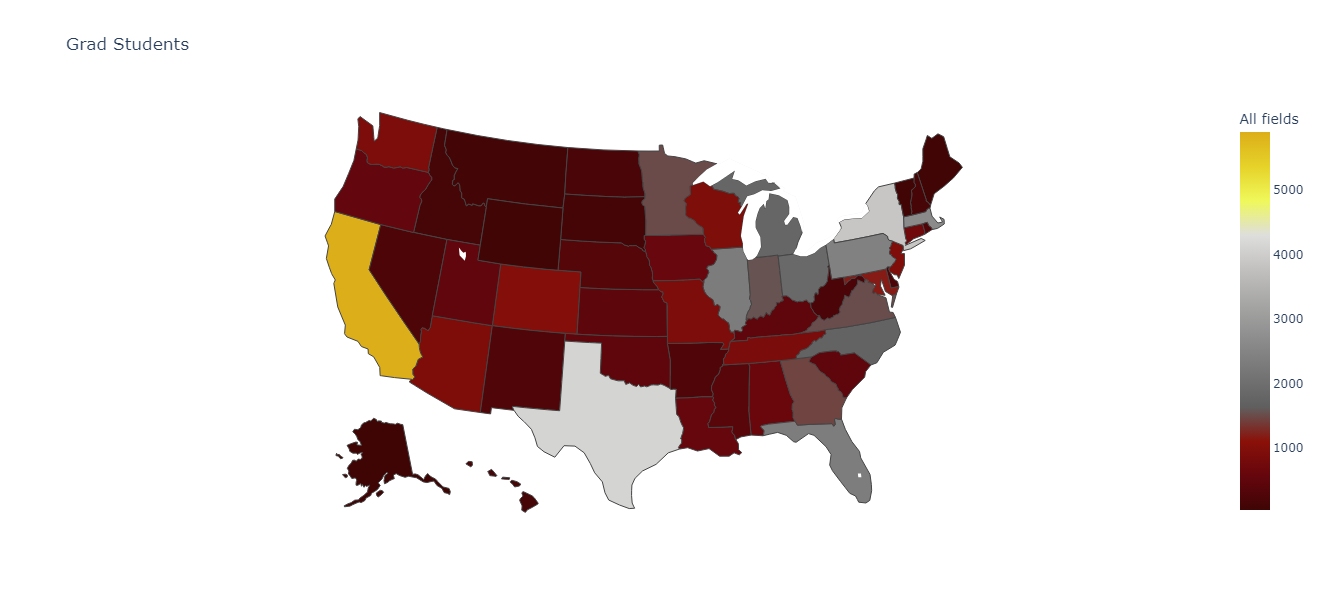

In [121]:

pltcolor = 'All fields'
hi = df710[pltcolor].max()
low = df710[pltcolor].min()
print(low,hi)

fig = px.choropleth(df710,
                    locations = 'Abbrev',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    color = pltcolor,
                    hover_name = 'State or location',
                    #hover_data = ['Male','Female'],
                    range_color = [low,hi],
                    color_continuous_scale = 'oxy',
                    width = 600,
                    height = 600,
                    title = 'Grad Students')
fig.show()

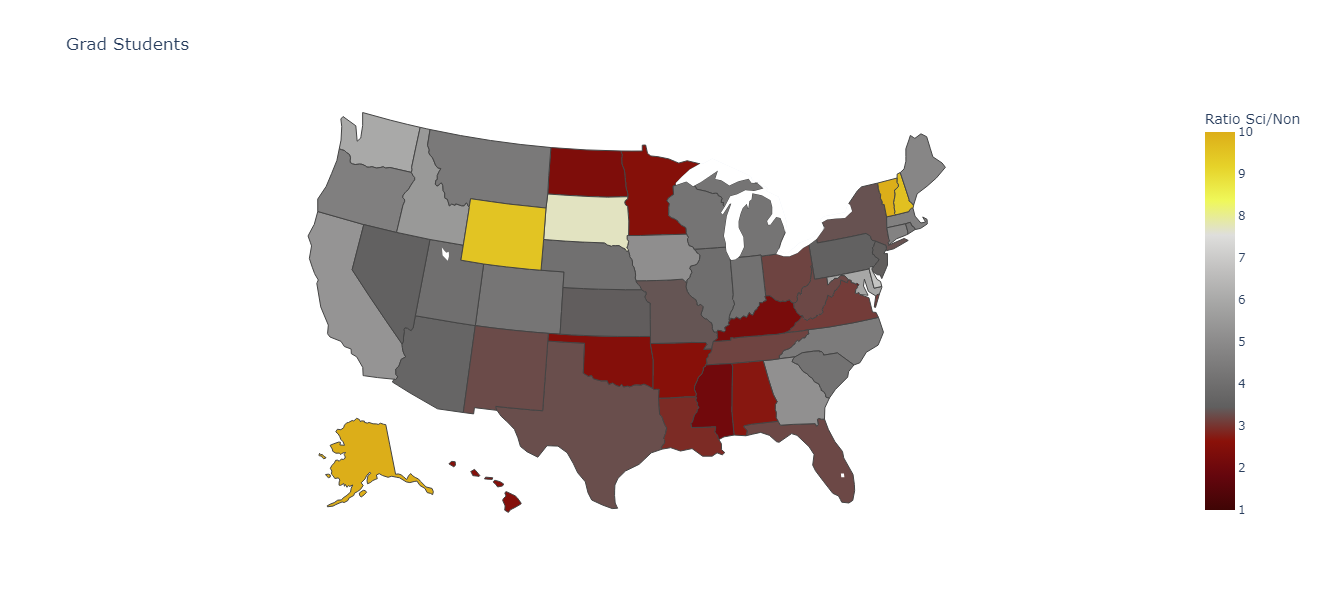

In [103]:
fig2 = px.choropleth(df,
                    locations = 'Abbrev',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    color = 'Ratio Sci/Non',
                    hover_name = 'State or location',
                    hover_data = ['Male','Female'],
                    range_color = [1,10],
                    color_continuous_scale = 'oxy',
                    width = 600,
                    height = 600,
                    title = 'Grad Students')
fig2.show()

In [156]:
df7103 = pd.read_csv("CSV/nsf23300-tab007-010-3.csv",encoding='cp1252')
df7103.drop([0])
df7103

,State or location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Agricultural sciences and natural resources,3.91,0.78,3.28,3.28,12.66,3.59,2.03,1.88,10.31,...,2.66,3.75,13.59,1.88,1.25,6.25,4.69,0.94,4.38,0.78
1,Biological and biomedical sciences,18.59,0.47,17.50,7.66,152.97,25.94,24.06,5.47,47.66,...,2.34,25.63,94.53,11.56,3.28,27.03,25.63,4.69,26.25,2.66
2,Computer and information sciences,1.72,0.00,4.84,2.81,44.53,6.09,3.44,1.41,21.72,...,0.78,3.28,23.59,3.44,0.47,12.19,5.94,0.47,3.28,0.16
3,Engineering,18.28,0.31,30.94,7.50,169.06,33.91,13.75,8.59,63.75,...,2.66,23.59,143.44,17.50,1.41,48.59,23.91,6.25,20.78,4.06
4,"Geosciences, atmospheric, and ocean sciences",1.25,1.72,3.59,0.31,22.81,8.75,2.19,0.63,10.47,...,0.78,0.94,17.34,2.19,0.00,4.53,5.31,0.47,1.41,1.25
5,Health sciences,4.69,0.00,6.41,1.25,27.66,7.19,3.13,0.31,21.41,...,1.88,6.56,33.44,4.84,0.00,11.41,9.06,2.19,10.31,0.00
6,Mathematics and statistics,3.44,0.00,3.91,0.31,36.88,7.19,5.63,1.41,10.78,...,0.16,3.13,24.69,3.44,0.16,6.41,7.34,0.47,8.13,0.31
7,Multidisciplinary/ interdisciplinary sciences,2.50,0.31,5.47,0.47,29.84,2.03,1.88,0.47,12.66,...,1.25,4.84,14.06,1.09,0.16,7.19,5.78,0.16,1.72,0.16
8,Physical sciences,7.03,0.31,13.44,3.13,104.38,16.72,15.16,4.38,28.91,...,2.03,10.78,48.75,6.88,1.25,18.13,15.00,3.44,16.88,1.41
9,Psychology,8.91,1.56,9.06,1.72,75.94,9.22,7.03,1.09,26.41,...,1.09,10.94,39.22,6.88,1.09,16.88,7.81,3.59,9.84,0.78


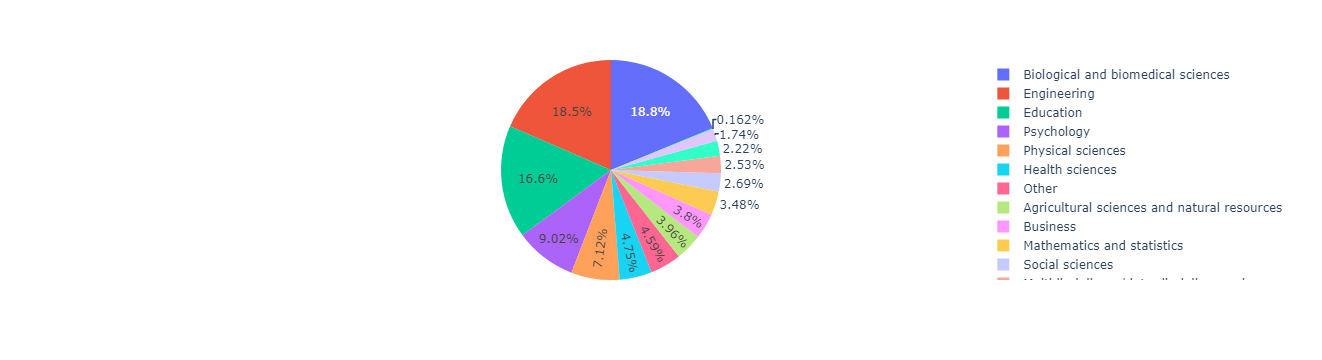

In [150]:
fig3 = px.pie(df7103, 'State or location', 'Alabama')
fig3.show()